In [1]:
import numpy as np
import torch
from mcspace.data_utils import get_data, get_mouse_diet_perturbations_dataset, get_human_timeseries_dataset
from mcspace.utils import get_device, pickle_load, pickle_save, get_summary_results, MODEL_FILE, DATA_FILE
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from mcspace.dataset import DataSet
import pandas as pd

# Paths

In [2]:
pwd

'C:\\Users\\Gary\\Partners HealthCare Dropbox\\Gurdip Uppal\\research_bwh\\MCSPACE_FINAL\\MCSPACE\\mcspace\\paper\\figures'

In [3]:
rootpath = Path("../../")

In [52]:
basepath = Path("./")
outpath = basepath / "data_figs"
outpath.mkdir(exist_ok=True, parents=True)

# Human dataset filtering

### Abundance threshold

In [8]:
abun_thres_vals = [0.0001,0.0005,0.001,0.0025,0.005,0.01,0.025,0.05]

human_notu_vals = np.zeros(len(abun_thres_vals))

for i,min_abundance in enumerate(abun_thres_vals):
    min_reads = 100
    max_reads=10000

    reads, num_otus, times, subjects, dataset = get_human_timeseries_dataset(
        min_abundance=min_abundance, min_reads=min_reads, max_reads=max_reads, rootpath=rootpath)
    human_notu_vals[i] = num_otus

c:\users\gary\partners healthcare dropbox\gurdip uppal\research_bwh\mcspace_final\mcspace\mcspace\dataset.py:21: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  self._long_data = pd.read_csv(reads)
c:\users\gary\partners healthcare dropbox\gurdip uppal\research_bwh\mcspace_final\mcspace\mcspace\dataset.py:21: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  self._long_data = pd.read_csv(reads)
c:\users\gary\partners healthcare dropbox\gurdip uppal\research_bwh\mcspace_final\mcspace\mcspace\dataset.py:21: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  self._long_data = pd.read_csv(reads)
c:\users\gary\partners healthcare dropbox\gurdip uppal\research_bwh\mcspace_final\mcspace\mcspace\dataset.py:21: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  self._long_data = pd.read

Text(0.5, 0, 'Abundance threshold')

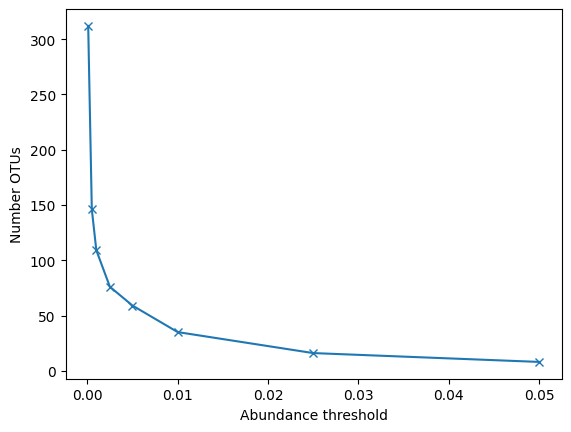

In [15]:
fig, ax = plt.subplots()
ax.plot(abun_thres_vals,human_notu_vals,'-x')
ax.set_ylabel("Number OTUs")
ax.set_xlabel("Abundance threshold")
# plt.savefig(outpath / "otu_filtering.png", bbox_inches="tight")

### Read threshold

In [10]:
def get_num_particles(reads, times, subjects):
    npart = 0
    for t in times:
        for s in subjects:
            npart += reads[t][s].shape[0]
    return npart

In [12]:
min_read_vals=[10,25,50,100,250,500,1000,2500]

human_npart_vals = np.zeros(len(min_read_vals))

for i,min_reads in enumerate(min_read_vals):
    max_reads=10000
    min_abundance=0.005 # from inspecting above plot
    num_consistent_subjects=1
    
    reads, num_otus, times, subjects, dataset = get_human_timeseries_dataset(
        min_abundance=min_abundance, min_reads=min_reads, max_reads=max_reads, rootpath=rootpath)
    num_particles = get_num_particles(reads, times, subjects)
    human_npart_vals[i] = num_particles

c:\users\gary\partners healthcare dropbox\gurdip uppal\research_bwh\mcspace_final\mcspace\mcspace\dataset.py:21: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  self._long_data = pd.read_csv(reads)
c:\users\gary\partners healthcare dropbox\gurdip uppal\research_bwh\mcspace_final\mcspace\mcspace\dataset.py:21: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  self._long_data = pd.read_csv(reads)
c:\users\gary\partners healthcare dropbox\gurdip uppal\research_bwh\mcspace_final\mcspace\mcspace\dataset.py:21: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  self._long_data = pd.read_csv(reads)
c:\users\gary\partners healthcare dropbox\gurdip uppal\research_bwh\mcspace_final\mcspace\mcspace\dataset.py:21: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  self._long_data = pd.read

Text(0.5, 0, 'Min number of reads')

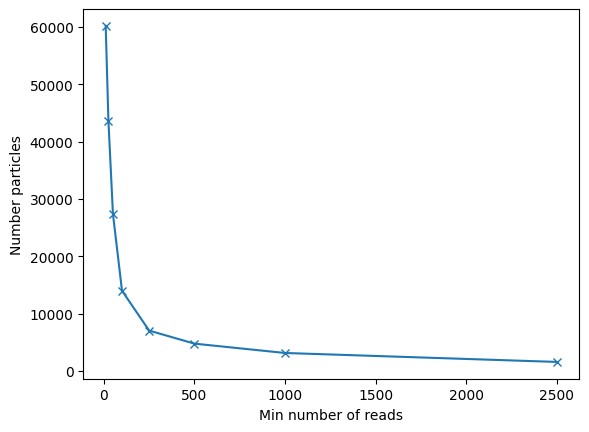

In [16]:
fig, ax = plt.subplots()
ax.plot(min_read_vals,human_npart_vals,'-x')
ax.set_ylabel("Number particles")
ax.set_xlabel("Min number of reads")

### Final filtering criteria

In [18]:
# from looking at plots and estimating an elbow
min_abundance=0.005
min_reads=250

max_reads = 10000

In [19]:
reads, num_otus, times, subjects, human_dataset = get_human_timeseries_dataset(
    min_abundance=min_abundance, min_reads=min_reads, max_reads=max_reads, rootpath=rootpath)


c:\users\gary\partners healthcare dropbox\gurdip uppal\research_bwh\mcspace_final\mcspace\mcspace\dataset.py:21: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  self._long_data = pd.read_csv(reads)


# Mouse dataset

### Abundance threshold

In [20]:
abun_thres_vals = [0.0001,0.0005,0.001,0.0025,0.005,0.01,0.025,0.05]

mouse_notu_vals = np.zeros(len(abun_thres_vals))

for i,min_abundance in enumerate(abun_thres_vals):
    min_reads = 100
    max_reads=10000

    reads, num_otus, times, subjects, dataset = get_mouse_diet_perturbations_dataset(
        min_abundance=min_abundance, min_reads=min_reads, max_reads=max_reads, rootpath=rootpath)
    mouse_notu_vals[i] = num_otus

c:\users\gary\partners healthcare dropbox\gurdip uppal\research_bwh\mcspace_final\mcspace\mcspace\dataset.py:23: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  self._long_data = pd.read_csv(reads, compression='gzip')
c:\users\gary\partners healthcare dropbox\gurdip uppal\research_bwh\mcspace_final\mcspace\mcspace\dataset.py:23: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  self._long_data = pd.read_csv(reads, compression='gzip')
c:\users\gary\partners healthcare dropbox\gurdip uppal\research_bwh\mcspace_final\mcspace\mcspace\dataset.py:23: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  self._long_data = pd.read_csv(reads, compression='gzip')
c:\users\gary\partners healthcare dropbox\gurdip uppal\research_bwh\mcspace_final\mcspace\mcspace\dataset.py:23: DtypeWarning: Columns (5) have mixed types. Specify dtype option on imp

Text(0.5, 0, 'Abundance threshold')

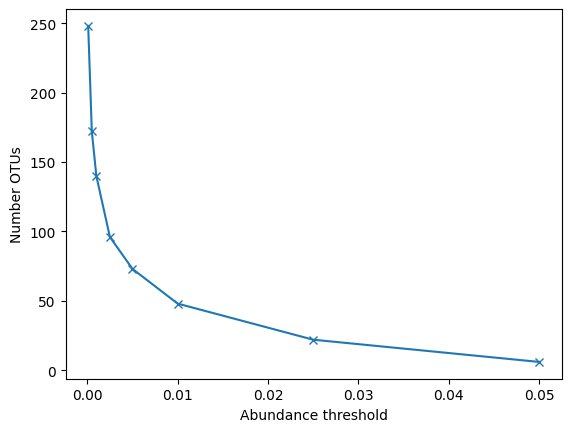

In [21]:
fig, ax = plt.subplots()
ax.plot(abun_thres_vals,mouse_notu_vals,'-x')
ax.set_ylabel("Number OTUs")
ax.set_xlabel("Abundance threshold")

### Read threshold

In [22]:
min_read_vals=[10,25,50,100,250,500,1000,2500]

mouse_npart_vals = np.zeros(len(min_read_vals))

for i,min_reads in enumerate(min_read_vals):
    max_reads=10000
    min_abundance=0.005 # from inspecting above plot
    num_consistent_subjects=1
    
    reads, num_otus, times, subjects, dataset = get_mouse_diet_perturbations_dataset(
        min_abundance=min_abundance, min_reads=min_reads, max_reads=max_reads, rootpath=rootpath)
    num_particles = get_num_particles(reads, times, subjects)
    mouse_npart_vals[i] = num_particles

c:\users\gary\partners healthcare dropbox\gurdip uppal\research_bwh\mcspace_final\mcspace\mcspace\dataset.py:23: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  self._long_data = pd.read_csv(reads, compression='gzip')
c:\users\gary\partners healthcare dropbox\gurdip uppal\research_bwh\mcspace_final\mcspace\mcspace\dataset.py:23: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  self._long_data = pd.read_csv(reads, compression='gzip')
c:\users\gary\partners healthcare dropbox\gurdip uppal\research_bwh\mcspace_final\mcspace\mcspace\dataset.py:23: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  self._long_data = pd.read_csv(reads, compression='gzip')
c:\users\gary\partners healthcare dropbox\gurdip uppal\research_bwh\mcspace_final\mcspace\mcspace\dataset.py:23: DtypeWarning: Columns (5) have mixed types. Specify dtype option on imp

Text(0.5, 0, 'Min number of reads')

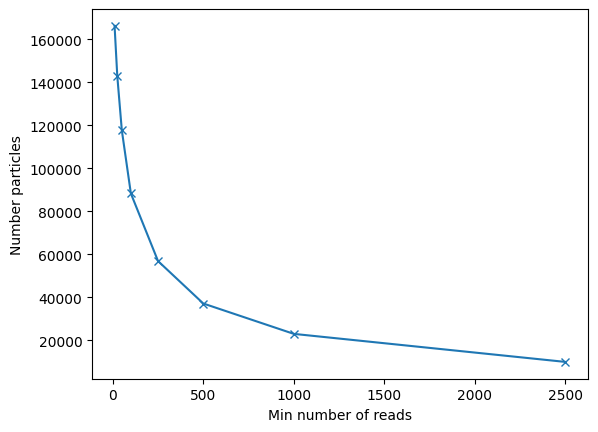

In [23]:
fig, ax = plt.subplots()
ax.plot(min_read_vals,mouse_npart_vals,'-x')
ax.set_ylabel("Number particles")
ax.set_xlabel("Min number of reads")

### Final filtering criteria

In [54]:
# from looking at plots and estimating an elbow
min_abundance=0.005
min_reads=250

max_reads = 10000

In [55]:
reads, num_otus, times, subjects, mouse_dataset = get_mouse_diet_perturbations_dataset(
    min_abundance=min_abundance, min_reads=min_reads, max_reads=max_reads, rootpath=rootpath)

c:\users\gary\partners healthcare dropbox\gurdip uppal\research_bwh\mcspace_final\mcspace\mcspace\dataset.py:23: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  self._long_data = pd.read_csv(reads, compression='gzip')


# Plot filtering criteria elbow plots

In [47]:
abun_thres_vals

[0.0001, 0.0005, 0.001, 0.0025, 0.005, 0.01, 0.025, 0.05]

In [49]:
min_read_vals

[10, 25, 50, 100, 250, 500, 1000, 2500]

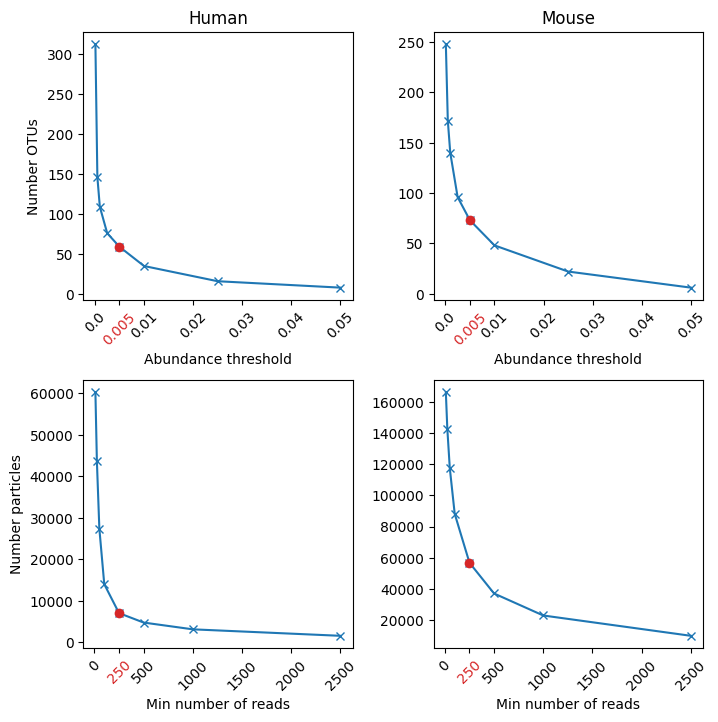

In [53]:
fig, ax = plt.subplots(figsize=(8,8), nrows=2, ncols=2)

abun_ticks = [0.0, 0.005, 0.01, 0.02, 0.03, 0.04, 0.05]
part_ticks = [0, 250, 500, 1000, 1500, 2000, 2500]

# Human data
ax[0,0].plot(abun_thres_vals, human_notu_vals, '-x')
ax[0,0].plot(abun_thres_vals[4], human_notu_vals[4], 'o', color='tab:red')
ax[0,0].set_ylabel("Number OTUs")
ax[0,0].set_xlabel("Abundance threshold")
ax[0,0].set_xticks(abun_ticks)
ax[0,0].set_xticklabels(abun_ticks, rotation=45)
plt.setp(ax[0,0].get_xticklabels()[1], color='tab:red')
ax[0,0].set_title("Human")

ax[1,0].plot(min_read_vals, human_npart_vals, '-x')
ax[1,0].plot(min_read_vals[4], human_npart_vals[4], 'o', color='tab:red')
ax[1,0].set_xticks(part_ticks)
ax[1,0].set_xticklabels(part_ticks, rotation=45)
plt.setp(ax[1,0].get_xticklabels()[1], color='tab:red')
ax[1,0].set_ylabel("Number particles")
ax[1,0].set_xlabel("Min number of reads")

# Mouse data
ax[0,1].plot(abun_thres_vals, mouse_notu_vals, '-x')
ax[0,1].plot(abun_thres_vals[4], mouse_notu_vals[4], 'o', color='tab:red')
ax[0,1].set_xticks(abun_ticks)
ax[0,1].set_xticklabels(abun_ticks, rotation=45)
plt.setp(ax[0,1].get_xticklabels()[1], color='tab:red')
ax[0,1].set_ylabel("")
ax[0,1].set_xlabel("Abundance threshold")
ax[0,1].set_title("Mouse")

ax[1,1].plot(min_read_vals, mouse_npart_vals, '-x')
ax[1,1].plot(min_read_vals[4], mouse_npart_vals[4], 'o', color='tab:red')
ax[1,1].set_xticks(part_ticks)
ax[1,1].set_xticklabels(part_ticks, rotation=45)
plt.setp(ax[1,1].get_xticklabels()[1], color='tab:red')
ax[1,1].set_ylabel("")
ax[1,1].set_xlabel("Min number of reads")

plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.savefig(outpath / "filtering_thresholds.png", bbox_inches="tight")

# Plot dataset figs

### get data stats

In [62]:
human_reads = human_dataset.get_reads()

In [59]:
human_times = human_dataset.times
human_subjects = human_dataset.subjects

In [63]:
human_reads[human_times[0]][human_subjects[0]].shape

(1419, 58)

In [74]:
human_numpart = np.zeros((len(human_times), len(human_subjects)))
human_numreads = []

In [75]:
for i,t in enumerate(human_times):
    for j,s in enumerate(human_subjects):
        counts = human_reads[t][s]
        human_numpart[i,j] = counts.shape[0]
        for lidx in range(counts.shape[0]):
            nreads = counts[lidx,:].sum()
            human_numreads.append(nreads)

In [67]:
np.median(human_numpart)

1419.0

In [69]:
np.percentile(human_numpart, q=75) - np.percentile(human_numpart, q=25)

451.0

In [77]:
human_numreads = np.array(human_numreads)

In [78]:
np.median(human_numreads)

843.0

In [79]:
np.percentile(human_numreads, q=75) - np.percentile(human_numreads, q=25)

1828.0

In [80]:
mouse_reads = mouse_dataset.get_reads()

In [81]:
mouse_times = mouse_dataset.times
mouse_subjects = mouse_dataset.subjects

In [82]:
mouse_reads[mouse_times[0]][mouse_subjects[0]].shape

(3626, 74)

In [83]:
mouse_numpart = np.zeros((len(mouse_times), len(mouse_subjects)))
mouse_numreads = []

In [84]:
for i,t in enumerate(mouse_times):
    for j,s in enumerate(mouse_subjects):
        counts = mouse_reads[t][s]
        mouse_numpart[i,j] = counts.shape[0]
        for lidx in range(counts.shape[0]):
            nreads = counts[lidx,:].sum()
            mouse_numreads.append(nreads)

In [85]:
np.median(mouse_numpart)

2829.0

In [86]:
np.percentile(mouse_numpart, q=75) - np.percentile(mouse_numpart, q=25)

1319.0

In [87]:
mouse_numreads = np.array(mouse_numreads)

In [88]:
np.median(mouse_numreads)

745.0

In [89]:
np.percentile(mouse_numreads, q=75) - np.percentile(mouse_numreads, q=25)

1390.0

## plot dataset fig

In [90]:
outpath

WindowsPath('data_figs')

In [91]:
pwd

'C:\\Users\\Gary\\Partners HealthCare Dropbox\\Gurdip Uppal\\research_bwh\\MCSPACE_FINAL\\MCSPACE\\mcspace\\paper\\figures'